In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [3]:
data = pd.read_csv('data/hfi_cc_2018.csv', sep=",")

In [4]:
data.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0


In [5]:
data.isnull().sum()

year                                    0
ISO_code                                0
countries                               0
region                                  0
pf_rol_procedural                     578
pf_rol_civil                          578
pf_rol_criminal                       578
pf_rol                                 80
pf_ss_homicide                         80
pf_ss_disappearances_disap             89
pf_ss_disappearances_violent           80
pf_ss_disappearances_organized        179
pf_ss_disappearances_fatalities        80
pf_ss_disappearances_injuries          80
pf_ss_disappearances                   80
pf_ss_women_fgm                       172
pf_ss_women_missing                   120
pf_ss_women_inheritance_widows        541
pf_ss_women_inheritance_daughters     541
pf_ss_women_inheritance               119
pf_ss_women                           100
pf_ss                                  80
pf_movement_domestic                   98
pf_movement_foreign               

## 1.Обрабока пропусков данных

### 1.1 Удаление и заполение нулями 

In [6]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1458, 123), (1458, 4))

In [7]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1458, 123), (0, 123))

In [8]:
# Заполнение всех пропущенных значений нулями
data_new_3 = data.fillna(0)
data_new_3.shape

(1458, 123)

### 1.2. "Внедрение значений" - импьютация (imputation)

In [9]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        if temp_perc > 5:
            continue
        num_cols.append(col)        
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка ef_government_consumption. Тип данных float64. Количество пустых значений 66, 4.53%.
Колонка ef_legal_gender. Тип данных float64. Количество пустых значений 24, 1.65%.
Колонка ef_money_growth. Тип данных float64. Количество пустых значений 70, 4.8%.
Колонка ef_money_sd. Тип данных float64. Количество пустых значений 72, 4.94%.
Колонка ef_money_inflation. Тип данных float64. Количество пустых значений 72, 4.94%.
Колонка ef_regulation_credit_private. Тип данных float64. Количество пустых значений 72, 4.94%.


In [10]:
data_num = data[num_cols]
data_num.head()

,ef_government_consumption,ef_legal_gender,ef_money_growth,ef_money_sd,ef_money_inflation,ef_regulation_credit_private
0,8.232353,0.948718,8.986454,9.484575,9.74360,7.295687
1,2.150000,0.820513,6.955962,8.339152,8.72046,5.301526
2,7.600000,0.846154,9.385679,4.986742,3.05400,9.194715
3,5.335294,0.769231,5.233264,5.224079,2.00000,4.259461
4,7.264706,1.000000,9.078264,9.263496,9.74600,7.306138


D:\Program\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Program\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


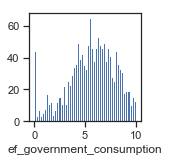

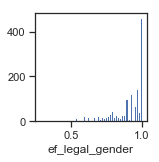

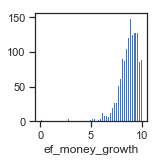

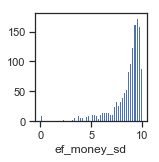

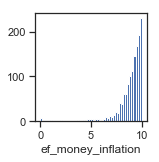

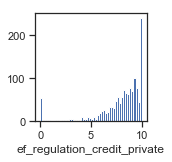

In [23]:
# Гистограмма по признакам
for col in data_num:
    plt.figure(figsize=(2,2))
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [24]:
#сохранение индексов строк с пустыми значениями
index_ef_money_sd = data[data['ef_money_sd'].isnull()].index

In [25]:
#сохранение значений необходимой колонки
data_num_ef_money_sd = data_num[['ef_money_sd']]

In [26]:
data[['ef_money_sd']].describe()

,ef_money_sd
count,1386.000000
mean,8.312361
std,1.787058
min,0.000000
25%,7.927429
50%,8.985148
75%,9.457505
max,9.950434


In [27]:
#библиотеки для импьютации
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [28]:
strategies=['mean', 'median','most_frequent']
#функция производит импьтацию с возможностью задавать колонку и вид
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0]

In [29]:
test_num_impute_col(data, 'ef_money_sd', strategies[1])

('ef_money_sd', 'median', 72, 8.985148101500002)

In [30]:
data[['ef_money_sd']].describe()

,ef_money_sd
count,1386.000000
mean,8.312361
std,1.787058
min,0.000000
25%,7.927429
50%,8.985148
75%,9.457505
max,9.950434


## 2. Перобразование категориальных признаков в числовые
### Кодирование категорий целочисленными значениями

In [34]:
data = pd.read_csv('data/StudentsPerformance.csv', sep=",")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [35]:
data['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
race_le = le.fit_transform(data['race/ethnicity'])

In [48]:
np.unique(race_le)

array([0, 1, 2, 3, 4])

In [49]:
le.inverse_transform([0, 1, 2, 3])

array(['group A', 'group B', 'group C', 'group D'], dtype=object)

## 2. Масштабирование данных

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['math score']])

D:\Program\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


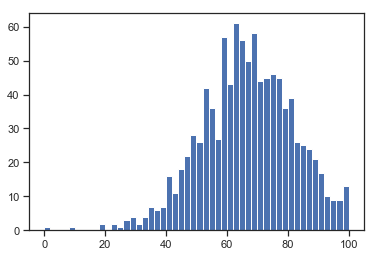

In [59]:
plt.hist(data['math score'], 50)
plt.show()

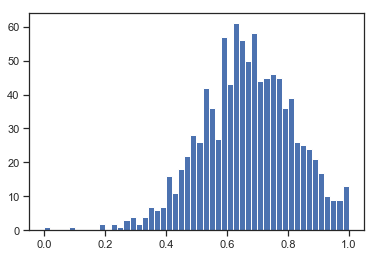

In [60]:
plt.hist(sc1_data, 50)
plt.show()